## CAB INVESTMENT ANALYSIS
### Overview
Company XYZ ,due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision

### Business Problem
The Company aims to maximise profit on the Cab Industry by choosing the firm which has the maximum return.

### Objectives
* To find out which company makes more profit and has a higher profit margin
* To find out which company has more users and the distribution of users across the cities
* To find out which company is mostly demanded and the demand per city
* To find out the demographic characteristics and economic status of people using cabs
* To find out which is the most preffered payment method

In [49]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
cabs=pd.read_csv('Cab_Data.csv')
cabs.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
cabs.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [5]:
city = pd.read_csv('City.csv')
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
city.tail()

,City,Population,Users
15,SACRAMENTO CA,"545,776","7,044"
16,PITTSBURGH PA,"542,085","3,643"
17,WASHINGTON DC,"418,859","127,001"
18,NASHVILLE TN,"327,225","9,270"
19,BOSTON MA,"248,968","80,021"


In [7]:
trans = pd.read_csv('Transaction_ID.csv')
trans.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [14]:
trans.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [8]:
cus = pd.read_csv('Customer_ID.csv')
cus.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [16]:
cus.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


we then concatenate the tables to one table to easily analyse the data

In [9]:
#we join cabs and city to find the number of users 
cabs_city = cabs.merge(city,how='inner',on=['City'])
cabs_city.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [10]:
#we merge cabs_city and trans to find the mode of payment
cabs_city_trans = cabs_city.merge(trans,how='inner',on=['Transaction ID'])
cabs_city_trans.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card


In [11]:
#we then merge cabs_city_trans with cus to find customer id
cabs_city_trans_cus = cabs_city_trans.merge(cus,how='inner',on=['Customer ID'])
cabs_city_trans_cus.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701",27703,Card,Male,27,9237


In [12]:
cabs_city_trans_cus.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
359387,10307228,43162,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,"418,859","127,001",51406,Cash,Female,29,6829
359388,10319775,43203,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,"418,859","127,001",51406,Cash,Female,29,6829
359389,10347676,43287,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,"418,859","127,001",51406,Card,Female,29,6829
359390,10358624,43314,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,"418,859","127,001",51406,Cash,Female,29,6829
359391,10370709,43342,Yellow Cab,WASHINGTON DC,34.24,453.11,427.3152,"418,859","127,001",51406,Card,Female,29,6829


In [13]:
cabs_city_trans_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Population          359392 non-null  object 
 8   Users               359392 non-null  object 
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 32.9+ MB


* There is a total of 14 columns,359392 entries.
* The data types of the columns are; 3 floats,5 integers,6 objects.

### DATA CLEANING/DATA PREPARATION

Here we prepare the data for analysis,we do the following:
* check for missing values
* check for uniformity
* check for duplicates
* check for outliers

In [15]:
#checking for missing values
cabs_city_trans_cus.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

there are no missing values

In [15]:
#checking for uniformity
cabs_city_trans_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Population          359392 non-null  object 
 8   Users               359392 non-null  object 
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 32.9+ MB


* Transaction ID and Customer ID are not necessary for descriptive analysis and therefore the dtypes should be changed to object.
* Columns Population and Users are useful in descriptive statistics therefore the dtypes changed to integers
* The column date is not in datetime format therefore dropped

In [14]:
#changing customer id and transactions id
cabs_city_trans_cus['Transaction ID'] = cabs_city_trans_cus['Transaction ID'].astype(str)
cabs_city_trans_cus['Customer ID'] = cabs_city_trans_cus['Customer ID'].astype(str)

In [15]:
#changing users and populations
cabs_city_trans_cus['Population'] = cabs_city_trans_cus['Population'].apply(lambda x:x.replace(',',''))
cabs_city_trans_cus['Population'] = cabs_city_trans_cus['Population'].astype(int)
cabs_city_trans_cus['Users'] = cabs_city_trans_cus['Users'].apply(lambda x:x.replace(',',''))
cabs_city_trans_cus['Users'] = cabs_city_trans_cus['Users'].astype(int)

In [16]:
cabs_city_trans_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  object 
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Population          359392 non-null  int32  
 8   Users               359392 non-null  int32  
 9   Customer ID         359392 non-null  object 
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int32(2), int64(3), object(6)
memory usage: 30.2+ MB


succesfully changed!

In [17]:
#drop date column
cabs_city_trans_cus.drop(['Date of Travel'],axis=1,inplace=True)
cabs_city_trans_cus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  object 
 1   Company             359392 non-null  object 
 2   City                359392 non-null  object 
 3   KM Travelled        359392 non-null  float64
 4   Price Charged       359392 non-null  float64
 5   Cost of Trip        359392 non-null  float64
 6   Population          359392 non-null  int32  
 7   Users               359392 non-null  int32  
 8   Customer ID         359392 non-null  object 
 9   Payment_Mode        359392 non-null  object 
 10  Gender              359392 non-null  object 
 11  Age                 359392 non-null  int64  
 12  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int32(2), int64(2), object(6)
memory usage: 27.4+ MB


* The number of columns has changed to 13
* The dtypes are classified as 3 floats,4 integers,6 objects

In [18]:
#check for duplicates
cabs_city_trans_cus.duplicated().sum()

0

there are no duplicates

<AxesSubplot:>

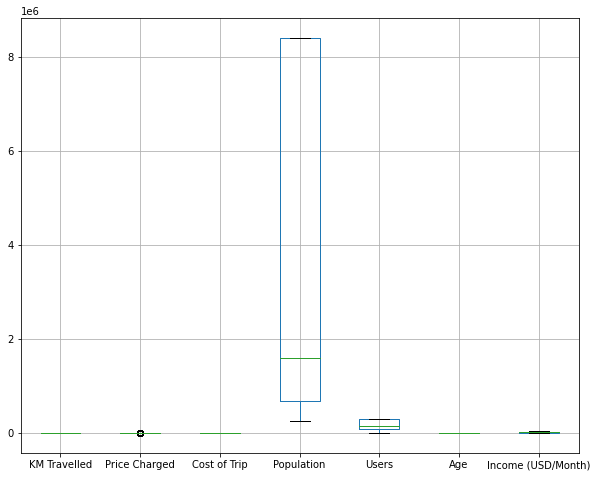

In [19]:
#check for outliers
cabs_city_trans_cus.boxplot(figsize=(10,8))

there are no outliers in the data

In [20]:
#describe our data
cabs_city_trans_cus.describe()

,KM Travelled,Price Charged,Cost of Trip,Population,Users,Age,Income (USD/Month)
count,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113,3.132198e+06,158365.582267,35.336705,15048.822937
std,12.233526,274.378911,157.993661,3.315194e+06,100850.051020,12.594234,7969.409482
min,1.900000,15.600000,19.000000,2.489680e+05,3643.000000,18.000000,2000.000000
25%,12.000000,206.437500,151.200000,6.712380e+05,80021.000000,25.000000,8424.000000
50%,22.440000,386.360000,282.480000,1.595037e+06,144132.000000,33.000000,14685.000000
75%,32.960000,583.660000,413.683200,8.405837e+06,302149.000000,42.000000,21035.000000
max,48.000000,2048.030000,691.200000,8.405837e+06,302149.000000,65.000000,35000.000000


* The maximum kilometre travelled is 48km while the minimum kilometre travelled is 1.9km
* The maximum price charged is 2048.03,the minimum price charged is 15.6 and the mean price charged is 423.4
* The maximum cost of a trip is 691.2 while the minimum cost of a trip is 19.0
* The maximum number of users is 302149,the minimum number of users is 3643,and total number of users is 359392
* The max age of a user is 65,the minimum age is 18 and the mean age is 35
* The max income of a cab is 35000 USD/Month,the minimum income is 2000 USD while the mean income is 15048.82USD/Month

In [21]:
cabs_city_trans_cus.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237


In [22]:
#describe categorical values
cabs_city_trans_cus['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

* Yellow cab has more users than pink cab

In [40]:
cabs_city_trans_cus['City'].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

* New York has more users of cabs followed by Chicago and Los Angeles.Pittsburgh has the least number of cab users

In [41]:
cabs_city_trans_cus['Payment_Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64

* Most users use card payment method than cash

In [42]:
cabs_city_trans_cus['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

* Male use cabs more than female

### FEATURE ENGINEERING

In [24]:
#Calculate profit
cabs_city_trans_cus['Profit'] = cabs_city_trans_cus['Price Charged']-cabs_city_trans_cus['Cost of Trip']
cabs_city_trans_cus['Profit']


0          57.3150
1         281.2772
2         194.6480
3          23.6660
4         253.9808
            ...   
359387    143.6180
359388     23.0464
359389     -5.8540
359390     -6.0900
359391     25.7948
Name: Profit, Length: 359392, dtype: float64

In [25]:
#Calculate profit margin
cabs_city_trans_cus['Profit_Margin'] = cabs_city_trans_cus['Profit']/cabs_city_trans_cus['Price Charged']

In [26]:
cabs_city_trans_cus.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit_Margin
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,57.3150,0.154509
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,281.2772,0.469813
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,194.6480,0.245752
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,23.6660,0.066010
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,253.9808,0.352213


In [27]:
#LET US BIN THE AGE COLUMN
cabs_city_trans_cus.loc[(cabs_city_trans_cus.Age)<18,'Age_Group'] = 'Kid'
cabs_city_trans_cus.loc[((cabs_city_trans_cus.Age>=18)&(cabs_city_trans_cus.Age<44)),'Age_Group'] = 'young adult'
cabs_city_trans_cus.loc[((cabs_city_trans_cus.Age>=44)&(cabs_city_trans_cus.Age<64)),'Age_Group'] = 'Mature adult'
cabs_city_trans_cus.loc[(cabs_city_trans_cus.Age)>64,'Age_Group'] = 'Old'

In [28]:
#LET US BIN THE INCOME COLUMN
cabs_city_trans_cus['Annual_Income'] = cabs_city_trans_cus['Income (USD/Month)'] * 12

In [29]:
cabs_city_trans_cus.loc[(cabs_city_trans_cus.Annual_Income<32048),'Income Group'] = 'Poor'
cabs_city_trans_cus.loc[((cabs_city_trans_cus.Annual_Income>32048) & (cabs_city_trans_cus.Annual_Income)< 53413),'Income Group']= 'loweer-middle'
cabs_city_trans_cus.loc[((cabs_city_trans_cus.Annual_Income>53413)&(cabs_city_trans_cus.Annual_Income<106827)),'Income Group'] = 'middle-income'
cabs_city_trans_cus.loc[((cabs_city_trans_cus.Annual_Income>106827)&(cabs_city_trans_cus.Annual_Income<373894)),'Income Group'] = 'Upper-middle'
cabs_city_trans_cus.loc[(cabs_city_trans_cus.Annual_Income>373894),'Income Group'] = 'Rich'


In [30]:
cabs_city_trans_cus.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Profit_Margin,Age_Group,Annual_Income,Income Group
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701,29290,Card,Male,28,10813,57.3150,0.154509,young adult,129756,Upper-middle
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,814885,24701,29290,Cash,Male,28,10813,281.2772,0.469813,young adult,129756,Upper-middle
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,814885,24701,29290,Card,Male,28,10813,194.6480,0.245752,young adult,129756,Upper-middle
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701,27703,Card,Male,27,9237,23.6660,0.066010,young adult,110844,Upper-middle
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,814885,24701,27703,Card,Male,27,9237,253.9808,0.352213,young adult,110844,Upper-middle


## EXPLORATORY DATA ANALYSIS

   * univariate analysis
   * Bivariate analysis
   * Multivariate analysis

#### univariate analysis

In [34]:
#creating histograms
def diagram(i):
    fig,ax=plt.subplots(figsize=(10,10))
    cab_val=cabs_city_trans_cus[i].value_counts()
    x= cab_val.index
    y= cab_val.values
    diagram = ax.bar(x,y)
    ax.set_title('number of transactions per {}'.format(i),fontsize=20)
    ax.set_xlabel('{}'.format(i),fontsize=15)
    ax.set_ylabel('number of transactions',fontsize=15)
    plt.xticks(rotation=45)
    plt.show()
    return diagram

### Which company has the highest number of transactions?

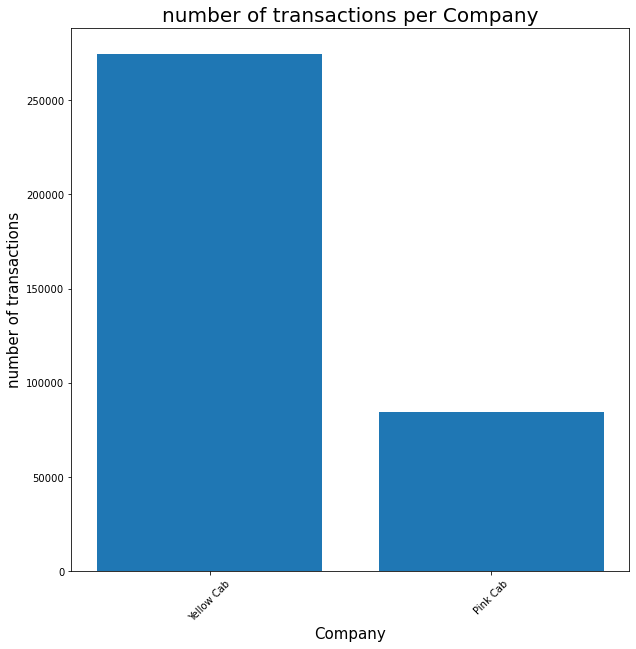

<BarContainer object of 2 artists>

In [35]:
diagram('Company')

Yellow cab has more number of transactions than pink cab

### Which city has the highest number of transactions

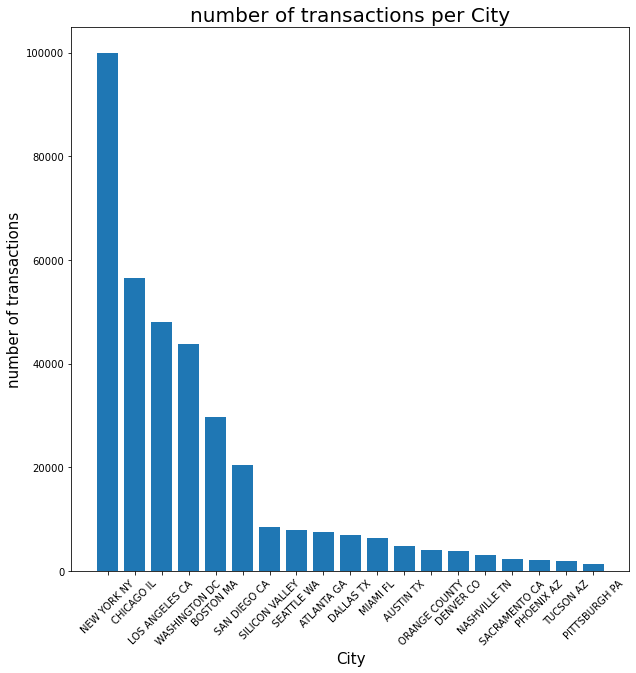

<BarContainer object of 19 artists>

In [36]:
diagram('City')

### Which gender has the highest number of transactions?

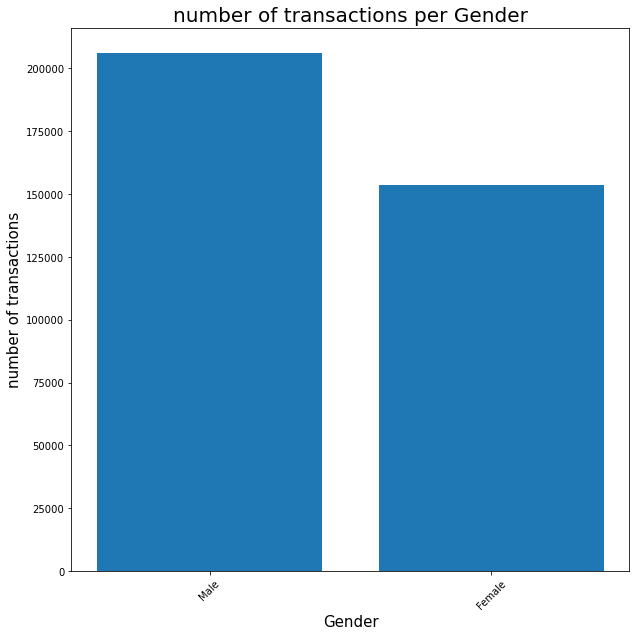

<BarContainer object of 2 artists>

In [37]:
diagram('Gender')

### Which is the most used payment method?

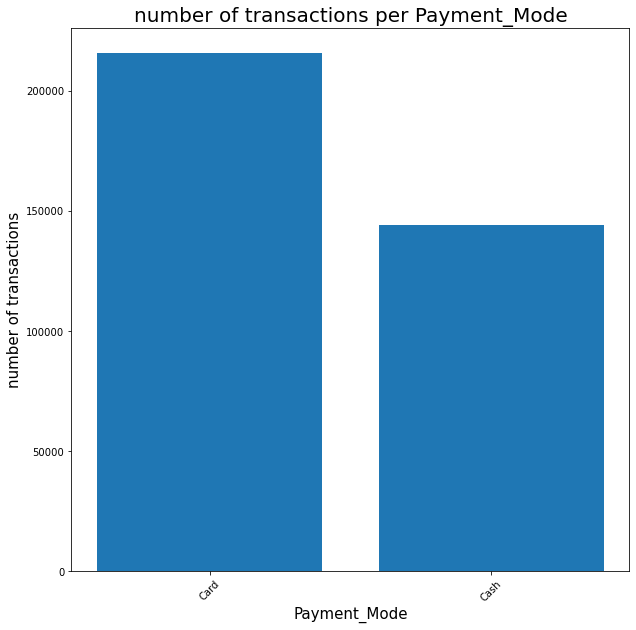

<BarContainer object of 2 artists>

In [38]:
diagram('Payment_Mode')

Most customers pay with card

### Bivariate Analysis

### Which company realizes more profit?

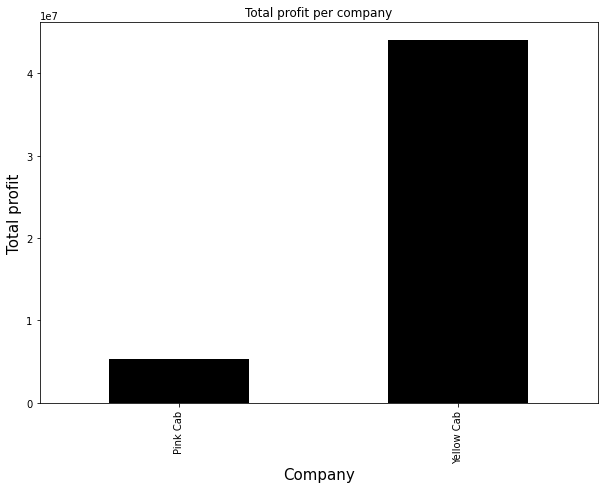

In [39]:
fig,ax=plt.subplots(figsize=(10,7))
cabs_city_trans_cus.groupby(['Company'])['Profit'].sum().plot(kind='bar',color='black')
plt.xlabel('Company',fontsize=15)
plt.ylabel('Total profit',fontsize=15)
plt.title('Total profit per company')
plt.show()

Yellow cab realizes more profit than pink cab

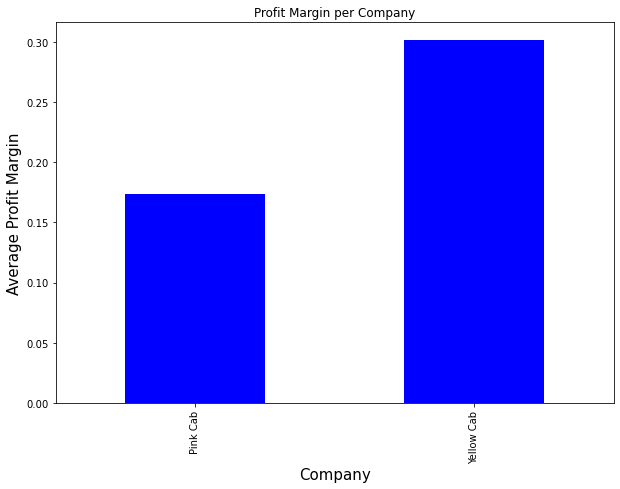

In [41]:
fig,ax=plt.subplots(figsize=(10,7))
cabs_city_trans_cus.groupby(['Company'])['Profit_Margin'].mean().plot(kind='bar',color='blue')
plt.xlabel('Company',fontsize=15)
plt.ylabel('Average Profit Margin',fontsize=15)
plt.title('Profit Margin per Company')
plt.show()

Yellow cab has a higher profit margin of 30 percent than pink cab with 18 percent profit margin

### Which company has more users?

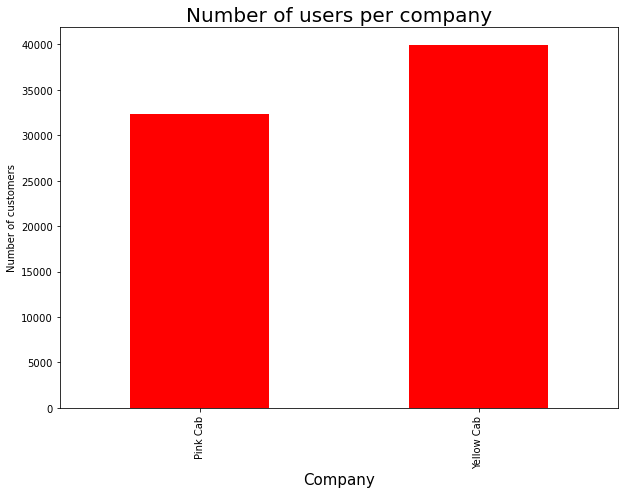

In [42]:
fig,ax=plt.subplots(figsize=(10,7))
cabs_city_trans_cus.groupby(['Company'])['Customer ID'].nunique().plot(kind='bar',color='red')
plt.title('Number of users per company',fontsize=20)
plt.xlabel('Company',fontsize=15)
plt.ylabel('Number of customers')
plt.show()

yellow cab has 38000 customers while pink cab has 32000 customers

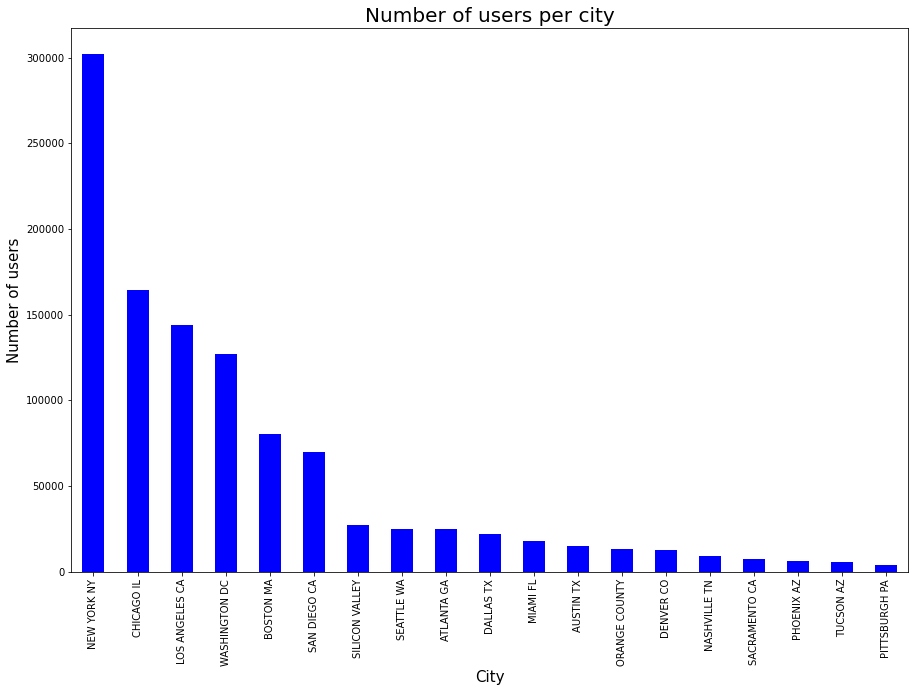

In [43]:
fig,ax =plt.subplots(figsize=(15,10))
cabs_city_trans_cus.groupby(['City'])['Users'].mean().sort_values(ascending=False).plot(kind='bar',color='blue')
plt.title('Number of users per city',fontsize=20)
plt.xlabel('City',fontsize=15)
plt.ylabel('Number of users',fontsize=15)
plt.show()

New York has the highest number of users with 30000 followed by Chicago 16000 and Los Angeles 14000,Pittsburg has the lowest number of users

### Multivariate Analysis

### What is the distribution of customers per city per company?

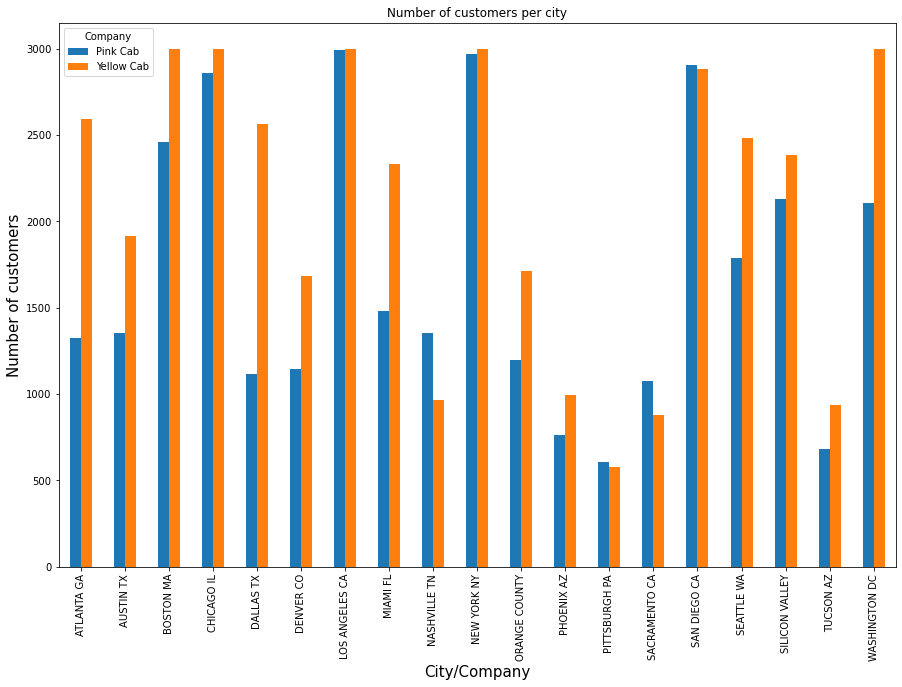

In [44]:
fig,ax=plt.subplots(figsize=(15,10))
Cab = cabs_city_trans_cus.groupby(['City','Company'])['Customer ID'].nunique()
Cab.unstack().plot(kind='bar',stacked=False,ax=ax)
plt.ylabel('Number of customers',fontsize=15)
plt.title('Number of customers per city')
plt.xlabel('City/Company',fontsize=15)
plt.show()


Pink cab has more market share than yellow cab in the following cities:
* Nashville TN
* Pittsburg PA
* Sacramento CA 
* San Diego CA 

in the remaining cities yellow cab has more market share

### What is the profit margin per company per city?

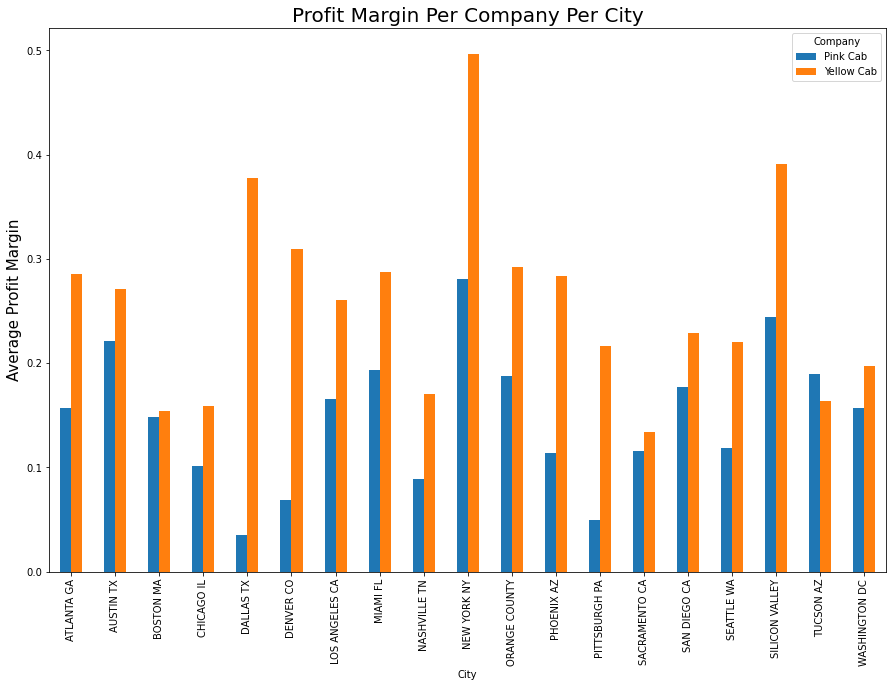

In [45]:
fig,ax = plt.subplots(figsize=(15,10))
Cab = cabs_city_trans_cus.groupby(['City','Company'])['Profit_Margin'].mean()
Cab.unstack().plot(kind='bar',stacked=False,ax=ax)
plt.title('Profit Margin Per Company Per City',fontsize=20)
plt.ylabel('Average Profit Margin',fontsize=15)
plt.show()
    

In all the cities Yellow cab has a higher profit margin except in Tuscon AZ where Pink cab has a higher profit margin  

### What is the age distribution of customers per company?

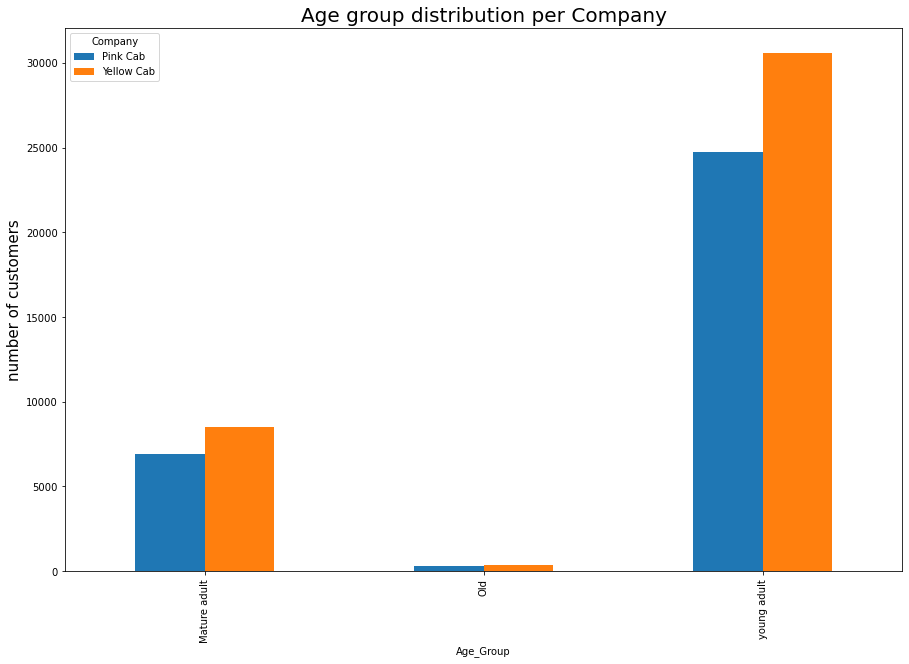

In [47]:
fig,ax = plt.subplots(figsize=(15,10))
cab = cabs_city_trans_cus.groupby(['Age_Group','Company'])['Customer ID'].nunique()
cab.unstack().plot(kind='bar',ax=ax)
plt.title('Age group distribution per Company',fontsize=20)
plt.ylabel('number of customers',fontsize=15)
plt.show()

* most customers for both companies are young adults
* many young adults prefer the yellow cab
* there is a low number of the old using cabs

### What is the income distribution of customers per company?

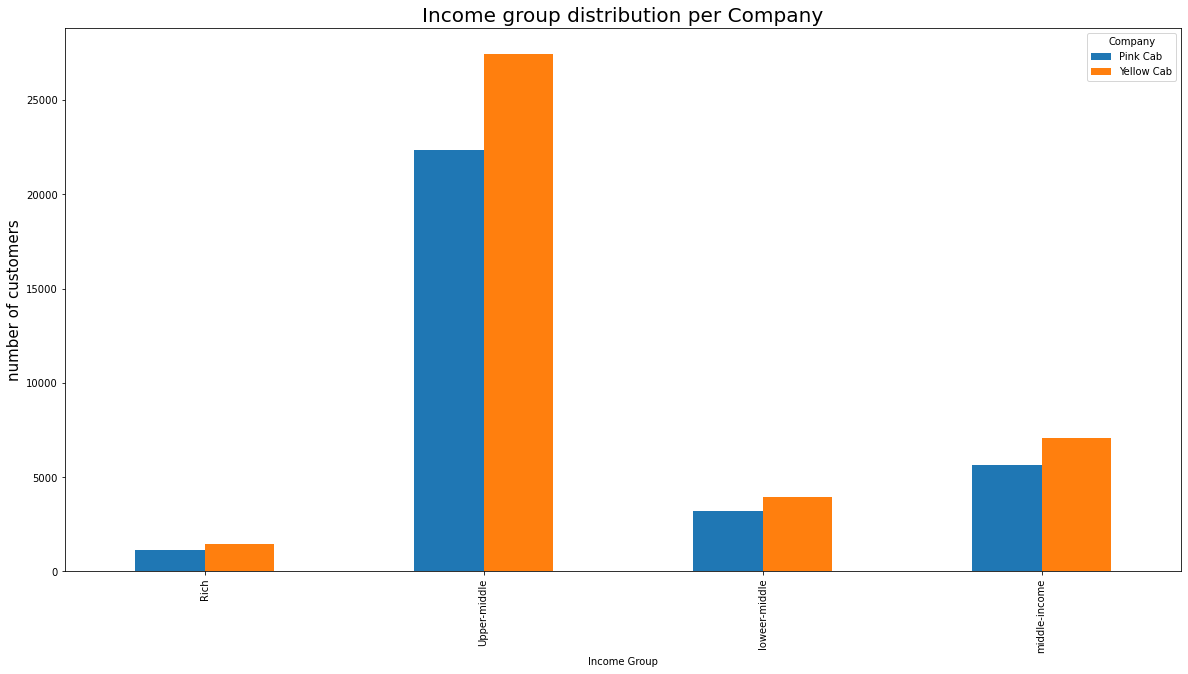

In [83]:
fig,ax = plt.subplots(figsize=(20,10))
cab = cabs_city_trans_cus.groupby(['Income Group','Company'])['Customer ID'].nunique()
cab.unstack().plot(kind='bar',ax=ax)
plt.title('Income group distribution per Company',fontsize=20)
plt.ylabel('number of customers',fontsize=15)
plt.show()

* The upper middle class use cabs the most among all income groups
* yellow cab is the preffered cab of use by all income groups

## RECOMMENDATIONS
* XYZ should invest in yellow cab because it has a larger market share of around 38000 users.
* XYZ should also focus its resources on these three major cities,New York,Chicago,Los Angeles because of the high number of users.
* XYZ should invest in yellow cab since it records higher profits and higher profit margin and it will prove to have a high return on investment?
* XYZ should focus its marketing strategies to capture the young population and mature adult as they are the most users of cabs
* XYZ should focus its marketing strategies to capture the middle-income and upper-middle income earners as they are the most users of cabs
* XYZ should develop a payment app as most users use cards for payment